In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set()

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set()

In [7]:
font = {
    'size': 'xx-large',
    'weight': 'bold'
}

Text(0.5, 1.0, 'CORELATIONS')

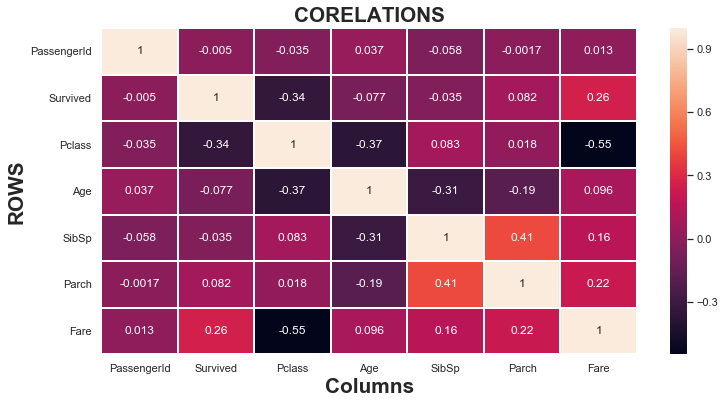

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot = True, linewidths=1,
           linecolor='w')
plt.xlabel('Columns',fontdict=font)
plt.ylabel('ROWS',fontdict=font)
plt.title('CORELATIONS', fontdict=font)

In [9]:

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
numerical_data = data[['PassengerId','Pclass','Fare']].copy()

In [11]:
survival_data = data['Survived'].copy()

In [12]:
from sklearn.model_selection import train_test_split

In [23]:
X, x_test, Y, y_test = train_test_split(numerical_data,
                                       survival_data,
                                       test_size=0.3,
                                       random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X,Y)

C:\Users\Akash Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
coefficients = model.coef_

In [18]:
coeff_dict = {
    'PassengerId': coefficients[0][0],
    'Pclass': coefficients[0][1],
    'Fare' : coefficients[0][2]
}

In [19]:
coeff_dict = pd.Series(coeff_dict)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

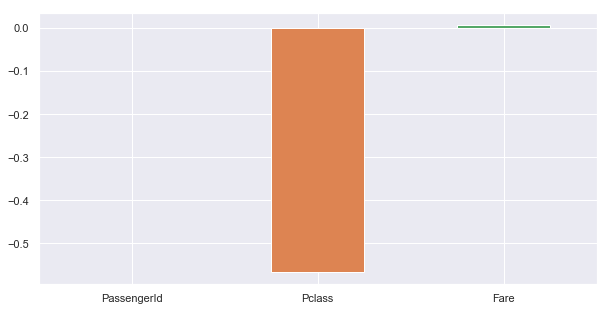

In [22]:
plt.figure(figsize=(10, 5))
coeff_dict.plot(kind='bar')
plt.xticks(rotation=0)


In [56]:
predictions = model.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
confusion = confusion_matrix(predictions, y_test)

In [59]:
confusion

array([[134,  58],
       [ 23,  53]], dtype=int64)

In [60]:
score = accuracy_score(predictions,y_test)

In [61]:
score

0.6977611940298507

In [62]:
data_test = pd.read_csv('test.csv')

In [63]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
data_test = data_test[['PassengerId','Pclass','Fare']].copy()

In [70]:
test_predictions =  model.predict(data_test)

In [68]:
data_test['Fare'] = data_test['Fare'].fillna(10)

In [69]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
dtype: int64

In [72]:
test_predictions = model.predict(data_test)

In [73]:
test_predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
test_predictions_df ={
    'PassengerId' : data_test['PassengerId'],
    'Survived' : test_predictions
}

In [77]:
test_predictions_df = pd.DataFrame(test_predictions_df)

In [78]:
test_predictions_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [80]:
test_predictions_df = test_predictions_df.set_index('PassengerId')

In [82]:
test_predictions_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [84]:
test_predictions_df.to_csv('a.csv')

In [ ]:
data